 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [161]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [215]:
# Reading whale returns
whale_returns = pd.read_csv("whale_returns.csv")
whale_returns.sort_index()

whale_returns = pd.read_csv('whale_returns.csv', parse_dates=True, index_col="Date", infer_datetime_format=True)
whale_returns.sort_index(axis=0, inplace=True, ascending=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [216]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [217]:
# Drop nulls
whale_returns.dropna()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [218]:
# Reading algorithmic returns
algo_returns = pd.read_csv("algo_returns.csv")
algo_returns.sort_index()

algo_returns = pd.read_csv('algo_returns.csv', parse_dates=True, index_col="Date", infer_datetime_format=True)
algo_returns.sort_index(axis=0, inplace=True, ascending=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [219]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [220]:
# Drop nulls
algo_returns = algo_returns.dropna()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [209]:
# Reading S&P 500 Closing Prices
sp500_history = pd.read_csv("sp500_history.csv")
sp500_history.sort_index()

sp500_history = pd.read_csv('sp500_history.csv', parse_dates=True, index_col="Date", infer_datetime_format=True)
sp500_history.sort_index(axis=0, inplace= True , ascending = True )
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [224]:
# Check Data Types
sp500_history.dtypes
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [225]:
# Fix Data Types
sp500_history ['Close'] = sp500_history['Close'].str.replace(',', '') 
sp500_history ['Close'] = sp500_history['Close'].str.replace('$', '')

sp500_history['Close'] = sp500_history['Close'].astype(float)
sp500_history.head()

/var/folders/_f/nzfmdqxs2lb5zn39jmyn6n2w0000gn/T/ipykernel_63411/1279343874.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_history ['Close'] = sp500_history['Close'].str.replace('$', '')


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [231]:
sp500_history.dtypes

Close    float64
dtype: object

In [233]:
# Calculate Daily Returns \
daily_returns = (sp500_history - sp500_history.shift(1)) / sp500_history.shift(1)
daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [235]:
# Drop nulls
daily_returns.dropna()
daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [237]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns = daily_returns.rename(columns={"Close":"SP500"})
daily_returns.head()

,SP500
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


## Combine Whale, Algorithmic, and S&P 500 Returns

In [238]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
returns = pd.concat([algo_returns,whale_returns,daily_returns], axis= "columns", join="inner")
returns

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP500
Date,,,,,,,
2015-03-02,-0.008158,0.003200,NaN,NaN,NaN,NaN,0.006125
2015-03-03,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,-0.004539
2015-03-04,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213,-0.004389
2015-03-05,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,0.001196
2015-03-06,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,-0.014174
...,...,...,...,...,...,...,...
2019-04-16,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837,0.000509
2019-04-17,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222,-0.002274
2019-04-18,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

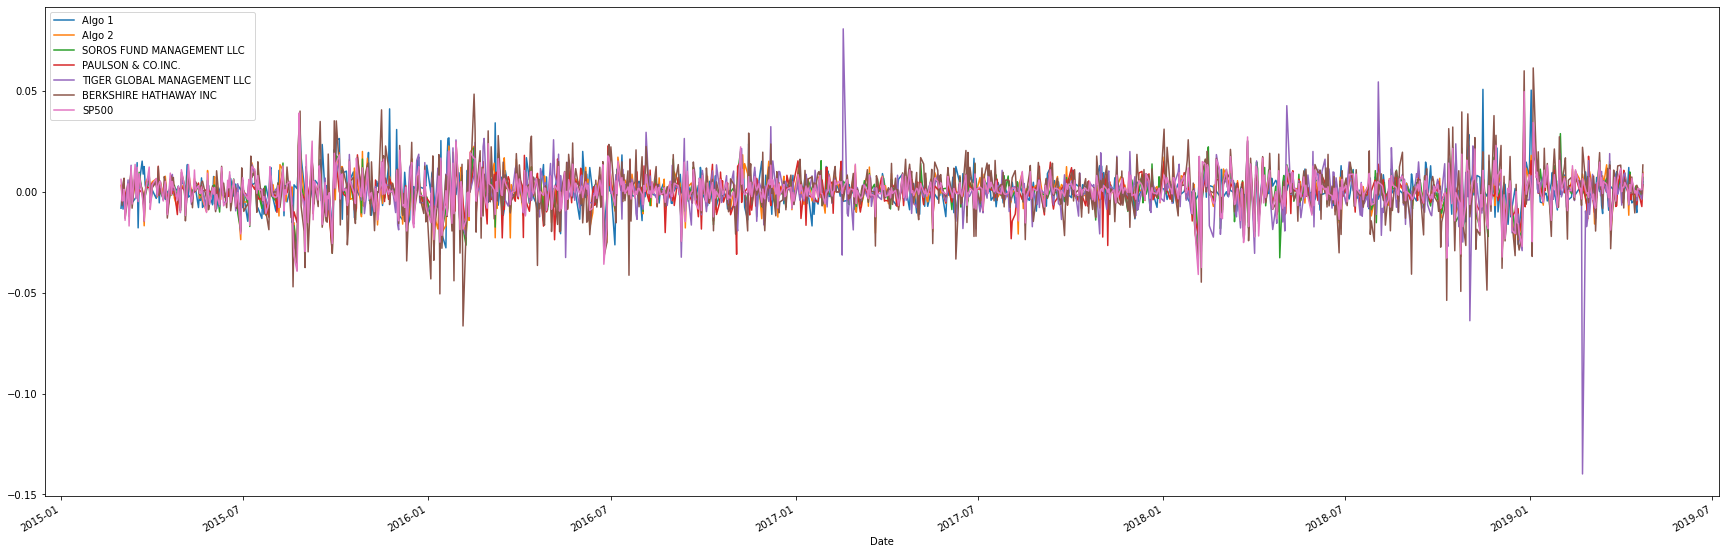

In [242]:
# Plot daily returns of all portfolios
returns.plot(figsize=(30,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

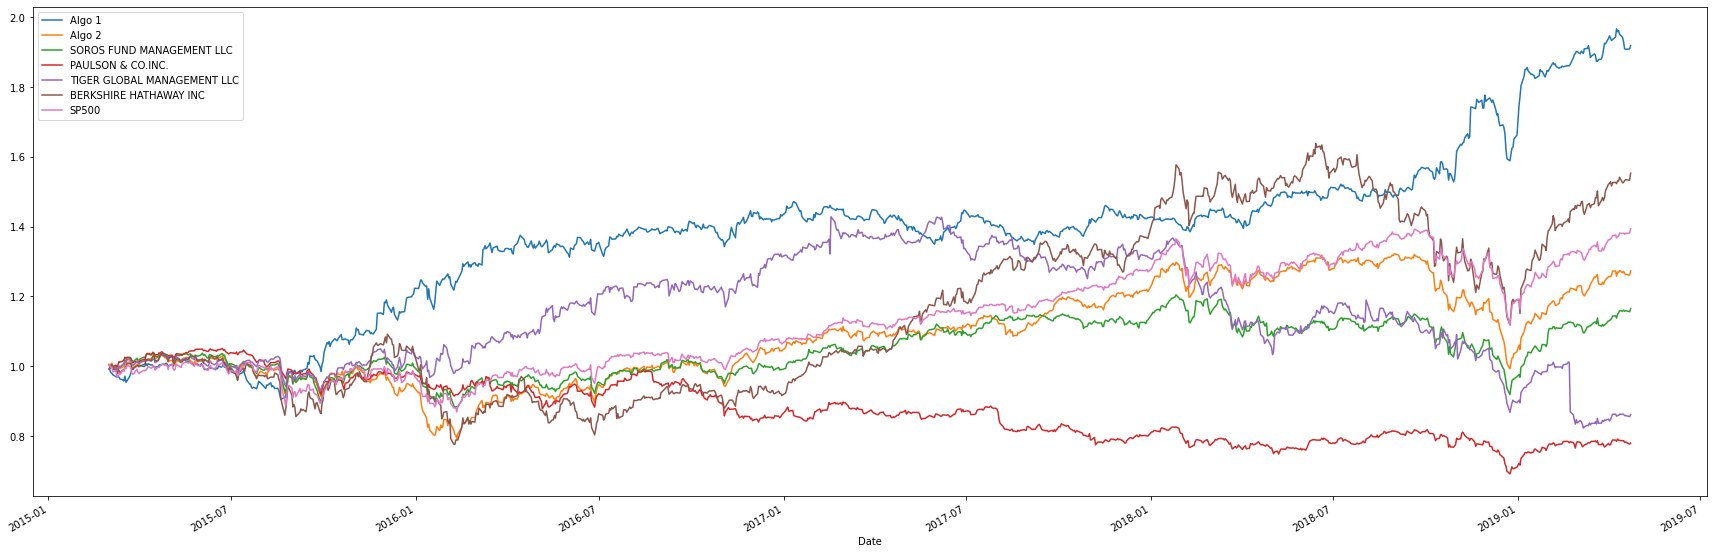

In [243]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + returns).cumprod()
cumulative_returns.head()

# Plot cumulative returns
cumulative_returns.plot(figsize=(30,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

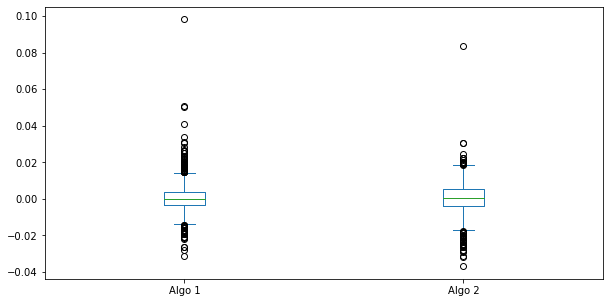

In [252]:
# Box plot to visually show risk
algo_returns.plot.box(figsize=(10,5))

### Calculate Standard Deviations

<AxesSubplot:>

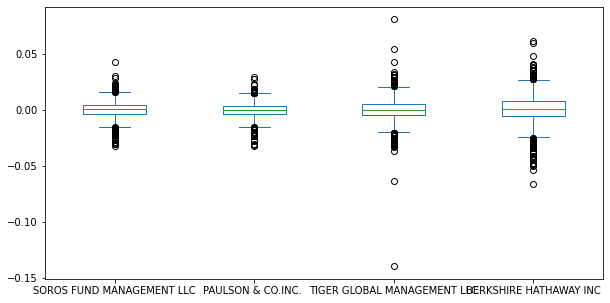

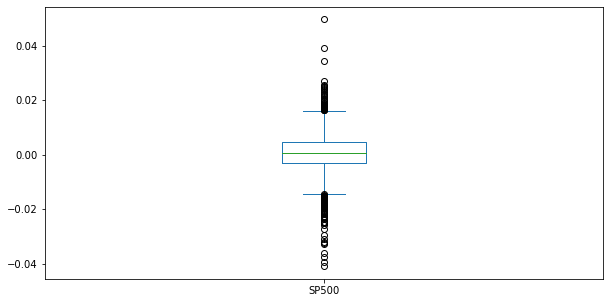

In [251]:
# Calculate the daily standard deviations of all portfolios
whale_returns.plot.box(figsize=(10,5))
daily_returns.plot.box(figsize=(10,5))

### Determine which portfolios are riskier than the S&P 500

In [255]:
# Calculate  the daily standard deviation of S&P 500
cumulative_returns.std()
# Determine which portfolios are riskier than the S&P 500
sp500_history = cumulative_returns['SP500'].std()
cumulative_returns.std() < sp500_history

Algo 1                         False
Algo 2                          True
SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.               True
TIGER GLOBAL MANAGEMENT LLC    False
BERKSHIRE HATHAWAY INC         False
SP500                          False
dtype: bool

### Calculate the Annualized Standard Deviation

In [264]:
# Calculate the annualized standard deviation (252 trading days)
volatility = cumulative_returns.std() * np.sqrt(252)
volatility.sort_values(inplace=True, ascending=False)
volatility

BERKSHIRE HATHAWAY INC         3.834878
Algo 1                         3.660363
TIGER GLOBAL MANAGEMENT LLC    2.378706
SP500                          2.306783
Algo 2                         2.096800
PAULSON & CO.INC.              1.404180
SOROS FUND MANAGEMENT LLC      1.162620
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

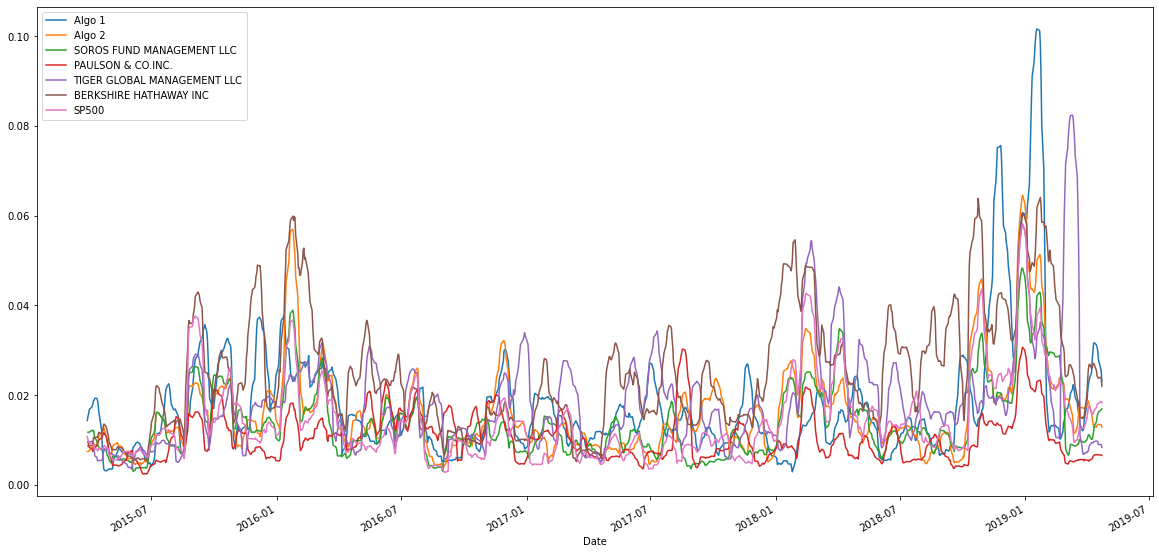

In [326]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
#### i was confused on why its a two part qustion so i answered both in one (i think)
# Plot the rolling standard deviation
cumulative_returns.rolling(window=21).std().plot(figsize=(20,10))

### Calculate and plot the correlation

In [263]:
# Calculate the correlation
correlation = joined_df.corr()
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_500
SOROS FUND MANAGEMENT LLC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAULSON & CO.INC.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TIGER GLOBAL MANAGEMENT LLC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BERKSHIRE HATHAWAY INC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algo 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algo 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SP_500,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [ ]:
# Calculate covariance of a single portfolio
covariance = cumulative_returns['AMZN'].cov(cumulative_returns['S&P 500'])
covariance
# Calculate variance of S&P 500

# Computing beta

# Plot beta trend
portfolio_returns.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [268]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [306]:
# Reading data from 1st stock
goog_history = pd.read_csv('goog_historical.csv', infer_datetime_format=True, parse_dates=True)
goog_history.head()


,Symbol,Trade DATE,NOCP
0,GOOG,5/9/2019,1162.38
1,GOOG,5/8/2019,1166.27
2,GOOG,5/7/2019,1174.10
3,GOOG,5/6/2019,1189.39
4,GOOG,5/3/2019,1185.40


In [316]:
goog_history.isnull().sum()

Symbol        0
Trade DATE    0
NOCP          0
dtype: int64

In [307]:
# Reading data from 2nd stock
aapl_history = pd.read_csv("aapl_historical.csv", infer_datetime_format=True, parse_dates=True)
aapl_history.head()

,Symbol,Trade DATE,NOCP
0,AAPL,5/9/2019,200.72
1,AAPL,5/8/2019,202.90
2,AAPL,5/7/2019,202.86
3,AAPL,5/6/2019,208.48
4,AAPL,5/3/2019,211.75


In [310]:
# Reading data from 3rd stock
cost_history = pd.read_csv("cost_historical.csv", infer_datetime_format=True, parse_dates=True)
cost_history.head()

,Symbol,Trade DATE,NOCP
0,COST,5/9/2019,243.47
1,COST,5/8/2019,241.34
2,COST,5/7/2019,240.18
3,COST,5/6/2019,244.23
4,COST,5/3/2019,244.62


In [323]:
# Combine all stocks in a single DataFrame
combined_stock_df = pd.concat([cost_history,aaple_history,goog_history], axis="columns", join="inner")
combined_stock_df

###Im getting an error of ("cannot concatenate object of type '<class 'pathlib.PosixPath'>'; only Series and DataFrame objs are valid")
###so i tried experimenting with changing the data type but ran out of time. 

In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [327]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)

# Display sample data
portfolio_returns.head()

ValueError: Dot product shape mismatch, (1649, 1) vs (3,)

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!